# Data analysis across scientific papers related to the limiting similarity hypothesis

## Limiting similarity: The invasion success of non-native species is high if they strongly differ from native species , and it is low if they are similar to native species.

## 1. Import the required libraries

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from orkg import ORKG
from bokeh.io import export_png
from bokeh.models import ColumnDataSource,LabelSet, HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool, DatetimeTickFormatter, Whisker
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from bokeh.palettes import Category10, Spectral6


import matplotlib.pyplot as plt


from math import pi

import os
import re
output_notebook()

Loading BokehJS ...

## 2. Connect to ORKG and import limiting similarity hypothesis comparison table

In [2]:
orkg = ORKG(host='https://orkg.org/orkg', simcomp_host='https://orkg.org/orkg/simcomp')

df = orkg.contributions.compare_dataframe(comparison_id='R52143')
df = df.T
df=df.rename(columns={'stand of hypothesis':'stand','paper:puplication_year':'puplication_year'})
#df

# 3. Preprocess the data

In [3]:
df['study']=df.iloc[:, 0]
df = df.reset_index()
df

,index,Research Method,Continent,Measure of species similarity,Measure of invasion success,hypothesis,stand,number of plant species,type of experiment,has research problem,Study date,same as,study
0,Functionally Similar Species Confer Greater Re...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Supported,1,Field,Testing the limiting similarity hypothesis in ...,2009,https://sws.geonames.org/6255149//https://www....,Experimental
1,The role of diversity and functional traits of...,Experimental,Asia,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Supported,1,Enclosure,Testing the limiting similarity hypothesis in ...,2004,https://sws.geonames.org/6255147//https://www....,Experimental
2,Testing Fox's assembly rule: does plant invasi...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Questioned,101,Field,Testing the limiting similarity hypothesis in ...,2004,https://sws.geonames.org/6255149//https://www....,Experimental
3,Is phylogenetic relatedness to native species ...,Observational or correlational,North America,Functional groups,Invasion Status from Database/ Expert judgemen...,limiting similarity,Supported,,Field,Testing the limiting similarity hypothesis in ...,2011,https://sws.geonames.org/6255149//https://www....,Observational or correlational
4,Experimental invasion by legumes reveals non-r...,Experimental,Europe,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Undecided,7,Field,Testing the limiting similarity hypothesis in ...,2005,https://sws.geonames.org/6255148//https://www....,Experimental
5,A test of the effects of functional group rich...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Questioned,10,Field,Testing the limiting similarity hypothesis in ...,2000,https://sws.geonames.org/6255149//https://www....,Experimental
6,Physiological and morphological traits of exot...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Questioned,7,Field,Testing the limiting similarity hypothesis in ...,2001,https://sws.geonames.org/6255149//https://www....,Experimental
7,Resistance of Native Plant Functional Groups t...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Supported,1,Field,Testing the limiting similarity hypothesis in ...,2010,https://sws.geonames.org/6255149//https://www....,Experimental
8,Grassland invader responses to realistic chang...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Supported,1,Field,Testing the limiting similarity hypothesis in ...,2007,https://sws.geonames.org/6255149//https://www....,Experimental
9,Plant functional group diversity as a mechanis...,Experimental,North America,Functional groups,Abundance/Biomass/Cover/Growth of exotic species,limiting similarity,Supported,1,Field,Testing the limiting similarity hypothesis in ...,2005,https://sws.geonames.org/6255149//https://www....,Experimental


### The main hypothesis is divided into 2 sub hypotheses according to the measure of species similarity.

## 4.  Analytical questions

## Question 1: How many research contributions have discussed this hypothesis? How many contributions support, are undecided, or question the hypothesis?

### The main hypothesis

In [4]:
df_stand = df.value_counts(['stand']).reset_index(name='count')
df_stand

,stand,count
0,Supported,19
1,Questioned,10
2,Undecided,4


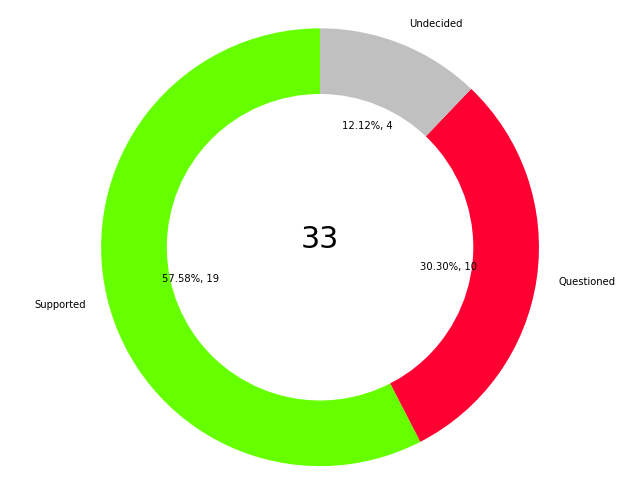

In [5]:
# With matplotlib
labels = np.array(df_stand["stand"]).astype(str)
sizes = np.array(df_stand["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']




fig1, ax1 = plt.subplots(figsize=(9, 7))
#patches, texts, autotexts = 
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"33", ha='center',fontsize=30)
#plt.title("Limiting similarity hypothesis",fontsize=20)
#autotexts[0].set_fontsize(15)
#texts[0].set_fontsize(15)
#texts[2].set_fontsize(15)

plt.rcParams.update({'font.size': 15})

plt.savefig("img/main_hyp.png")


plt.show()

## Question 2: How many contributions have discussed each sub hypotheses? How many contributions support, are undecided, or question each sub hypothesis?

### The first sub hypothesis considers functional groups as the measure of species similarity.

In [6]:
df_groups = df[df['Measure of species similarity']=='Functional groups']
df_groups_grouped = df_groups.value_counts(['stand']).reset_index(name='count')
df_groups_grouped 

,stand,count
0,Supported,16
1,Questioned,9
2,Undecided,3


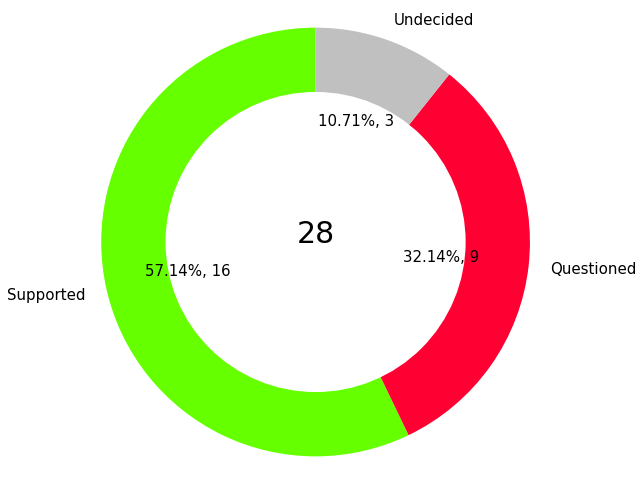

In [7]:
# With matplotlib
labels = np.array(df_groups_grouped["stand"]).astype(str)
sizes = np.array(df_groups_grouped["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"28", ha='center',fontsize=30)
#plt.title("Functional groups",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp1.png")


plt.show()

### The second sub hypothesis considers functional traits as the measure of species similarity.

In [8]:
df_traits = df[df['Measure of species similarity']=='Functional traits']
df_traits_grouped = df_traits.value_counts(['stand']).reset_index(name='count')
df_traits_grouped 

,stand,count
0,Supported,3
1,Undecided,1
2,Questioned,1


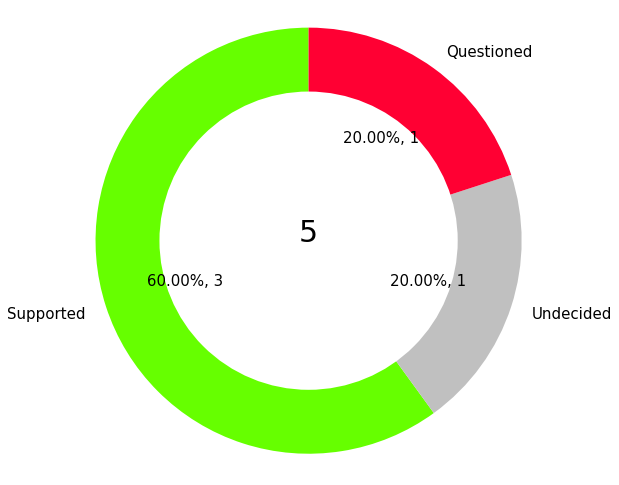

In [9]:
# With matplotlib
labels = np.array(df_traits_grouped["stand"]).astype(str)
labels
sizes = np.array(df_traits_grouped["count"]).astype(int)
sizes 
colors = ['#66FF00','#C0C0C0','#FF0033']



fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"5", ha='center',fontsize=30)
#plt.title("Functional traits",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp2.png")


plt.show()

## The hierarchy of the hypothesis: Create a graph visualization of the main and sub hypotheses and save it in a pdf file (the pdf file is already created in 'img' folder).

In [10]:
from graphviz import Digraph

g = Digraph('G', filename='img/limiting_similarity.gv')
g.edge('A', 'B')
g.edge('A', 'C')
g.node('A', shape='none',label="", image="main_hyp.PNG")
g.node('B', shape='none',label="", image="hyp1.PNG")
g.node('C', shape='none',label="", image="hyp2.PNG")
g.view()

'img\\limiting_similarity.gv.pdf'

## Show the graph visualizaion here in the notebook

In [11]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('img/limiting_similarity.gv.pdf',size=(900,850))

## In this hypothesis all studies investigated only plant species

## Question 3: How many plant taxa did each article investigate? 

In [12]:
# This row has an only value
df1 = df[df['number of plant species'].notna()]

In [13]:
# Puplication year
#df['Study date'] = pd.to_datetime(df['Study date'].astype(str), format='%Y')
dates = np.array(df1['Study date'])
# mumber of plant species
df1['number of plant species'] = pd.to_numeric(df1['number of plant species'])
plants = np.array(df1['number of plant species'])
# study names
studies = np.array(df1['index'])
#dates
stand_of = np.array(df1['stand'])

In [14]:
df9 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'


show(p)

In [15]:
export_png(p, filename='img/plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\limiting_similarity\\img\\plant.png'

## Question 4: When were the relevant articles published? In other words, what are the most productive years in terms of publishing articles related to this hypothesis?

In [17]:
df_study_date = df.value_counts(['Study date']).reset_index(name='count')
df_study_date

,Study date,count
0,2013,5
1,2012,5
2,2010,3
3,2004,3
4,2014,2
5,2011,2
6,2009,2
7,2008,2
8,2006,2
9,2005,2


In [18]:
study_date = np.array(df_study_date['Study date'])
count_dates = np.array(df_study_date['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000','#00FFFF','#4682B4','#ffb3b3']

In [19]:
df20 = pd.DataFrame(data=dict(dates=study_date,counts=count_dates,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Article date', '@dates'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@dates': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df20)
p = figure(x_range= study_date,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Puplication year',
           y_axis_label='Number of articles',
    #      title="Number of studies in each year"
          )

p.vbar(x='dates',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/6


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [20]:
export_png(p, filename='img/years.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\limiting_similarity\\img\\years.png'

## Question 5: Where did the studies related to this hypothesis take place?

In [21]:
df_stand_cont = df.value_counts(['Continent']).reset_index(name='count')
df_stand_cont

,Continent,count
0,North America,23
1,Europe,5
2,Oceania,4
3,Asia,1


In [22]:
cont = np.array(df_stand_cont['Continent'])
count = np.array(df_stand_cont['count'])
palette = ['#00ffbf','#8000ff','#996666','#ffb3b3']
# With bokeh
df10 = pd.DataFrame(data=dict( continents=cont,counts=count,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Continent', '@continents'),
        ('Number of studies', '@counts')
    ],
        formatters={
        '@continents': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df10)
p = figure(x_range= cont,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Continent',
           y_axis_label='Number of articles',
      #    title="Number of studies in each continent"
          )

p.vbar(x='continents',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
show(p)




In [23]:
export_png(p, filename='img/continents.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\limiting_similarity\\img\\continents.png'